In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
%store -r student_courses
%store -r student_majors
%store -r stem_paths
%store -r jacobs
%store -r jacobs_ethnicities
%store -r bcdi
%store -r waivers
%store -r beeps

In [96]:
jacobs = jacobs.loc[jacobs['ppsk'] != 'MISSING']
jacobs['ppsk'] = jacobs['ppsk'].astype(int)
waivers = waivers.loc[waivers['ppsk'] != 'MISSING']
waivers['ppsk'] = waivers['ppsk'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [97]:
parent_income = jacobs[jacobs['ppsk'].isin(stem_paths[~stem_paths['income.parent'].isna()]['ppsk'])].merge(stem_paths[['income.parent','ppsk']], on='ppsk')
parent_income = parent_income.merge(waivers[['ppsk','Full Waiver', 'Partial Waiver', 'Partial Exception']],on='ppsk',how='inner')

In [177]:
wow = jacobs.merge(student_majors[['ppsk','major']], on='ppsk').merge(stem_paths[['ppsk','ethnic.l1','gender']], on='ppsk').drop_duplicates().rename(columns = {'ethnic.l1':"Ethnicity"}).groupby(['major', 'Ethnicity']).count().unstack()['ppsk']

In [178]:
wow['Total'] = wow.sum(axis=1)

In [179]:
wow.sort_values(by='Total', ascending=False).head()

Ethnicity,Asian/Pacific Islander,International,Underrepresented Minority,White/Other,Total
major,,,,,
Mechanical Engineering,646.0,125.0,178.0,516.0,1465.0
L&S Computer Science,527.0,124.0,32.0,196.0,879.0
Letters & Sci Undeclared,423.0,76.0,85.0,230.0,814.0
Electrical Eng & Comp Sci,342.0,54.0,44.0,122.0,562.0
Cognitive Science,335.0,62.0,49.0,86.0,532.0


Text(0.5, 0, 'Number of Students')

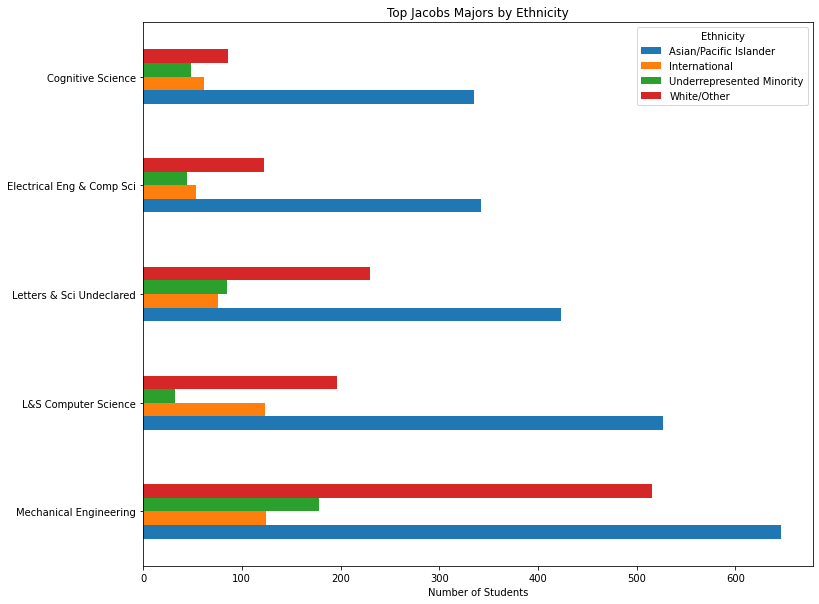

In [180]:
wow.sort_values(by='Total', ascending=False).drop('Total',axis=1).head().plot(kind = 'barh',figsize=(12,10), title='Top Jacobs Majors by Ethnicity', xlabel="").set_xlabel('Number of Students')

In [133]:
graphing = parent_income[~parent_income['ppsk'].duplicated()]
graphing[graphing['income.parent'] < 80000].sort_values(by='income.parent', ascending=True).merge(student_majors[['ppsk','major']], on='ppsk').drop_duplicates().groupby('major').count()[['ppsk']].sort_values(by='ppsk')#.head(5)#.plot(kind='barh')

,ppsk
major,
Anthropology,1
Spanish-Latin-Amer Lang & Lit,1
Rhetoric,1
Planetary Science,1
Music,1
...,...
Bioengineering,28
Architecture,44
Cognitive Science,44


In [99]:
student_majors

,ppsk,undergrad.status,year.name,Count of Students,college,division,department,major,exam.units
65498,651215,U,2007 Fall,1,Clg of Letters & Science,L&S Math & Phys Sciences Div,Mathematics,Applied Mathematics,5.4
48603,626974,U,2007 Fall,1,Clg of Letters & Science,L&S Social Sciences Division,Interdisc Social Science Pgms,Development Studies,8.0
7565,329180,U,2007 Fall,1,Clg of Letters & Science,L&S Social Sciences Division,Interdisc Social Science Pgms,Cognitive Science,0.0
7568,329246,G,2007 Fall,1,Grad School of Education,Grad School of Education,Education,Education,0.0
48590,626956,G,2007 Fall,1,Grad School of Education,Grad School of Education,Education,Education,0.0
...,...,...,...,...,...,...,...,...,...
21431,3187659,U,2020 Spring,1,Clg of Letters & Science,L&S Administered Programs,L&S Computer Science,L&S Computer Science,NaN
21432,3187668,U,2020 Spring,1,Clg of Letters & Science,L&S Undeclared,L&S Undeclared,Letters & Sci Undeclared,NaN
21433,3187669,U,2020 Spring,1,Clg of Engineering,Clg of Engineering,Electrical Eng & Computer Sci,Electrical Eng & Comp Sci,NaN
21420,3187555,U,2020 Spring,1,Clg of Letters & Science,L&S Undergrad Studies Division,UG Interdisciplinary Studies,Media Studies,NaN


Text(0.5, 0, 'Number of Students')

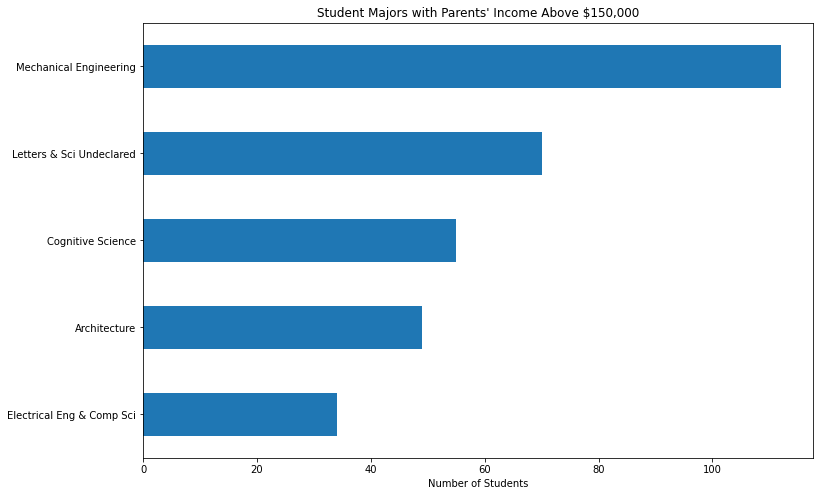

In [130]:
graphing[graphing['income.parent'] < 150000].merge(student_majors[['ppsk','major']], on='ppsk').drop_duplicates().groupby('major').count()['ppsk'].sort_values().tail(5).plot(kind='barh', figsize=(12,8), title='Student Majors with Parents\' Income Above $150,000', xlabel="", ylabel='Count').set_xlabel("Number of Students")

In [101]:
graphing['Under 50,000'] = graphing['income.parent'].map(lambda x: x < 50000)
graphing['50k to 100k'] = graphing['income.parent'].map(lambda x: (x >= 50000) & (x < 100000))
graphing['100k to 250k'] = graphing['income.parent'].map(lambda x: (x >= 100000) & (x < 250000))
graphing['250k+'] = graphing['income.parent'].map(lambda x: x >= 250000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [102]:
test = pd.DataFrame(
    index=['Under $50,000', '$50k to \$100k', '$100k to \$250k', '$250k+'], 
    data = [
        graphing['Under 50,000'].sum(), 
        graphing['50k to 100k'].sum(), 
        graphing['100k to 250k'].sum(), 
        graphing['250k+'].sum()])

In [103]:
test

,0
"Under $50,000",412
$50k to \$100k,231
$100k to \$250k,112
$250k+,16


In [104]:
data = pd.DataFrame({
    'Under 50,000': [graphing['Under 50,000'].sum()],
    '50k to 100k': [graphing['50k to 100k'].sum()],
    '100k to 250k': [graphing['100k to 250k'].sum()],
    '250k+': [graphing['250k+'].sum()]
    })


In [105]:
data.sum(axis=1)

0    771
dtype: int64

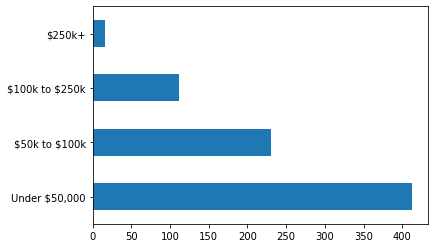

In [106]:
test.plot(kind='barh',legend=False)
#graphing.groupby(['Under 50,000', '50k to 100k', '100k to 250k', '250k+']).count().unstack().fillna(0)['ppsk'].plot()

Text(0.5, 1.0, "Maker Pass Waivers by Student's Parent's Income")

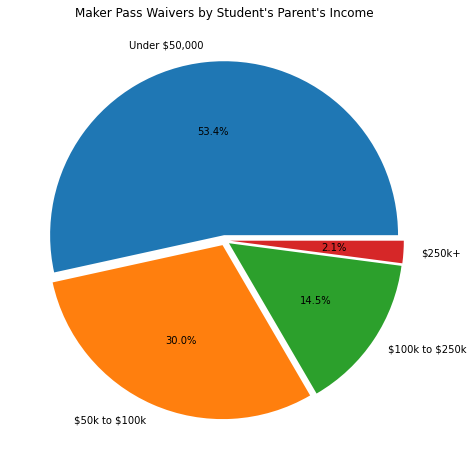

In [107]:
plt.figure(figsize = (10,8))
plt.pie(test[0], labels = test.index, autopct="%.1f%%", explode=[0.03]*4, pctdistance=0.6)
plt.title("Maker Pass Waivers by Student's Parent's Income")